<a href="https://colab.research.google.com/github/DHYANAJPATEL/ANN_Project/blob/main/ANN_FINAL_PROJECTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import itertools
import pathlib
from PIL import Image

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainpath = '/content/drive/MyDrive/train'
filepaths =[]
labels = []
folds = os.listdir(trainpath)

for fold in folds:
    f_path = os.path.join(trainpath , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
df

,filepaths,label
0,/content/drive/MyDrive/train/NORMAL/IM-0508-00...,NORMAL
1,/content/drive/MyDrive/train/NORMAL/IM-0551-00...,NORMAL
2,/content/drive/MyDrive/train/NORMAL/IM-0526-00...,NORMAL
3,/content/drive/MyDrive/train/NORMAL/IM-0525-00...,NORMAL
4,/content/drive/MyDrive/train/NORMAL/IM-0545-00...,NORMAL
...,...,...
5211,/content/drive/MyDrive/train/PNEUMONIA/person1...,PNEUMONIA
5212,/content/drive/MyDrive/train/PNEUMONIA/person1...,PNEUMONIA
5213,/content/drive/MyDrive/train/PNEUMONIA/person1...,PNEUMONIA
5214,/content/drive/MyDrive/train/PNEUMONIA/person1...,PNEUMONIA


In [ ]:
testpath = '/content/drive/MyDrive/test'

filepaths =[]
labels = []
folds = os.listdir(testpath)

for fold in folds:
    f_path = os.path.join(testpath , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
testd = pd.concat([Fseries , Lseries] , axis = 1)


In [ ]:
validpath = '/content/drive/MyDrive/val'

filepaths =[]
labels = []
folds = os.listdir(validpath)

for fold in folds:
    f_path = os.path.join(validpath , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
validfr = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle= True, random_state= 42)
validfr_df, testd_df= train_test_split(dummy_df, train_size= 0.6, shuffle= True, random_state= 42)

In [ ]:
imagesize = (224 ,224)
batchsize = 16
imageshape= (imagesize[0], imagesize[1], 3)

def scalar(img):
    return img

trgen = ImageDataGenerator(preprocessing_function= scalar)
tsgen = ImageDataGenerator(preprocessing_function= scalar)

traingen = trgen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = imagesize ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batchsize)
validgen = tsgen.flow_from_dataframe(validfr_df , x_col = 'filepaths' , y_col = 'label' , target_size = imagesize ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batchsize)
testgen = tsgen.flow_from_dataframe(testd_df , x_col= 'filepaths' , y_col = 'label' , target_size = imagesize ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batchsize)

Found 4172 validated image filenames belonging to 2 classes.
Found 626 validated image filenames belonging to 2 classes.
Found 418 validated image filenames belonging to 2 classes.


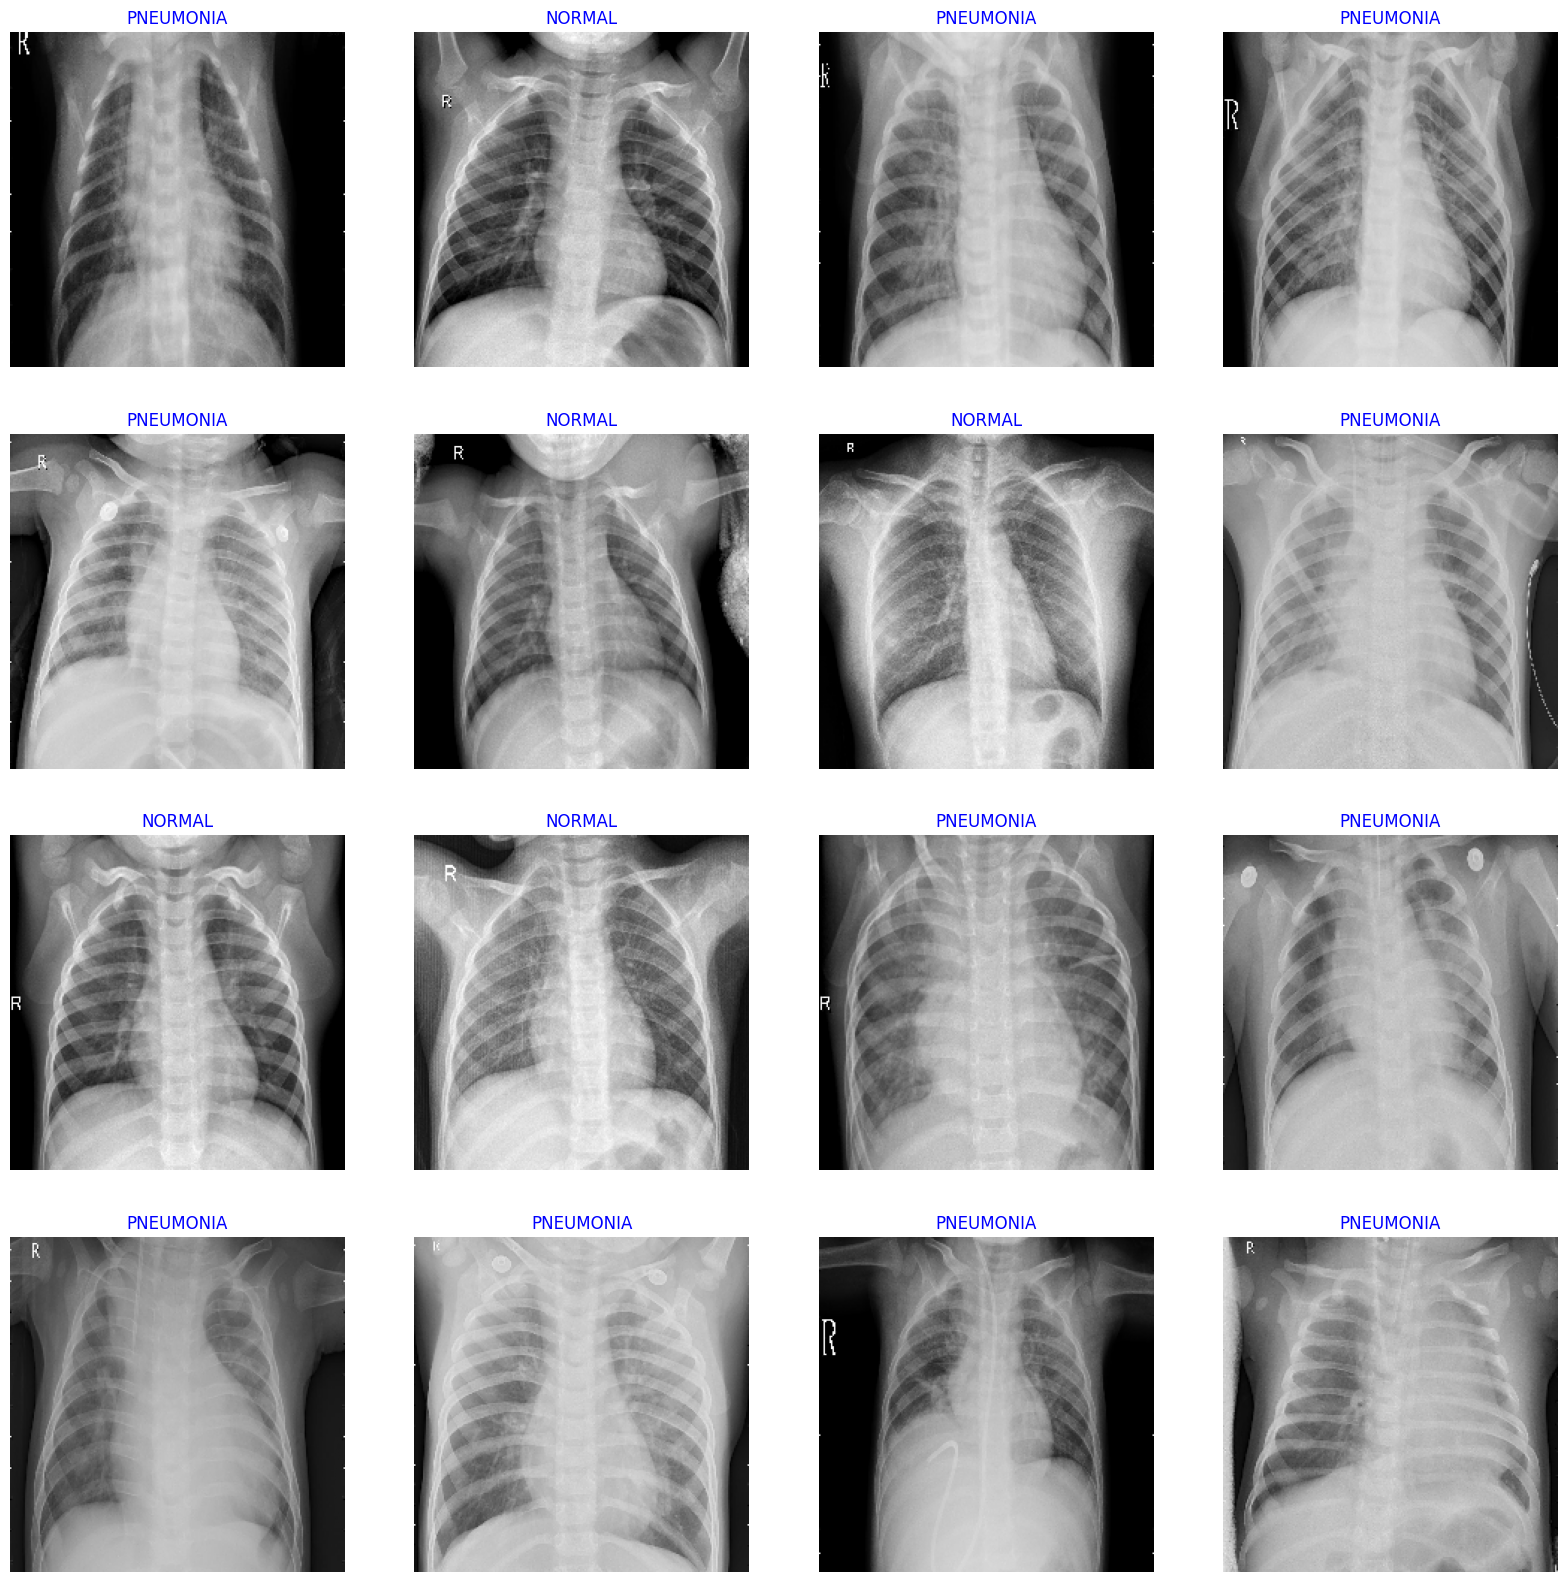

In [ ]:
gen_diict = traingen.class_indices
classes = list(gen_diict.keys())
images , labels = next(traingen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

In [ ]:
imagesize = (224,224)
imageshape = (imagesize[0] , imagesize[1] , 3)
nummclass = len(classes)
bmodel = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet',input_shape = imageshape, pooling= 'max')
model = Sequential([
    bmodel,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(nummclass , activation = 'softmax')
])
model.compile(Adamax(learning_rate = 0.0001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_1 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 256)               393472    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 11183665 (42.66 MB)
Trainable params: 11

In [ ]:
Epochs = 6
history = model.fit(x= traingen , epochs = Epochs, verbose = 1, validation_data= validgen,validation_steps = None , shuffle = False)

Epoch 1/6
261/261 [==============================] - 2588s 10s/step - loss: 7.7270 - accuracy: 0.8504 - val_loss: 7.5981 - val_accuracy: 0.7923
Epoch 2/6
261/261 [==============================] - 2448s 9s/step - loss: 6.7395 - accuracy: 0.9295 - val_loss: 6.5886 - val_accuracy: 0.8450
Epoch 3/6
261/261 [==============================] - 2427s 9s/step - loss: 5.9473 - accuracy: 0.9427 - val_loss: 5.5928 - val_accuracy: 0.9665
Epoch 4/6
261/261 [==============================] - 2404s 9s/step - loss: 5.2901 - accuracy: 0.9576 - val_loss: 5.0205 - val_accuracy: 0.9824
Epoch 5/6
261/261 [==============================] - 2375s 9s/step - loss: 4.7978 - accuracy: 0.9655 - val_loss: 4.5744 - val_accuracy: 0.9840
Epoch 6/6
261/261 [==============================] - 2427s 9s/step - loss: 4.4074 - accuracy: 0.9648 - val_loss: 4.2101 - val_accuracy: 0.9824


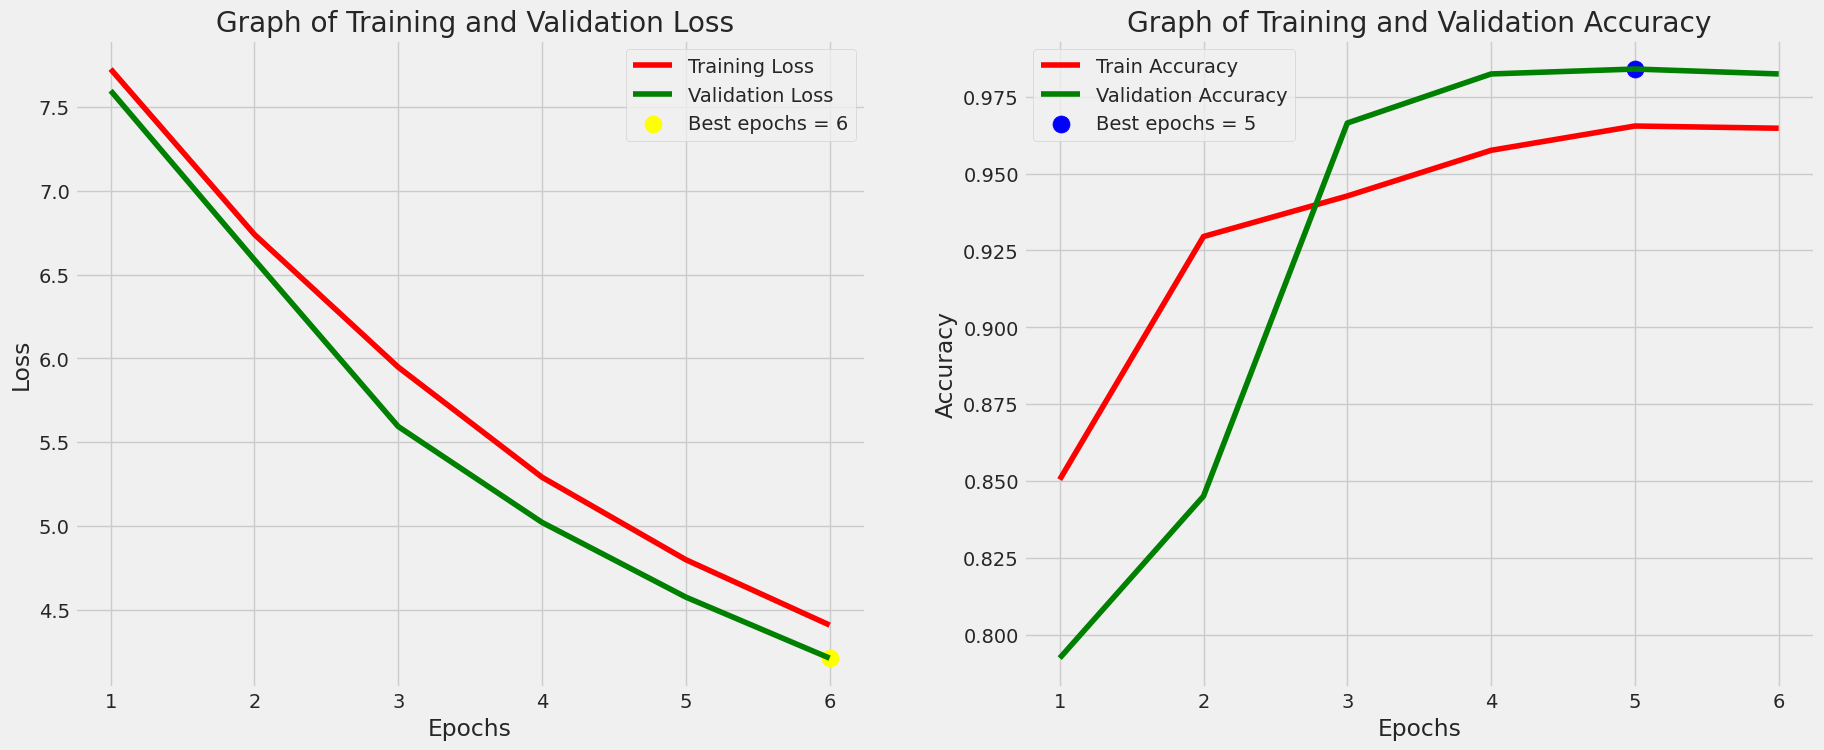

In [ ]:
train_accu = history.history['accuracy']
training_loss = history.history['loss']

val_accu = history.history['val_accuracy']
validation_loss = history.history['val_loss']

index_loss = np.argmin(validation_loss)
validation_lowest = validation_loss[index_loss]

index_acc = np.argmax(val_accu)
val_highest = val_accu[index_acc]

Epochs = [i+1 for i in range(len(train_accu))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'
#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , training_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , validation_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , validation_lowest , s = 150 , c = 'yellow',label = loss_label)
plt.title(' Graph of Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_accu , 'r' , label = 'Train Accuracy')
plt.plot(Epochs , val_accu , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Graph of Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [ ]:
trainingscore = model.evaluate(traingen , steps =16 , verbose = 1)
validatingscore = model.evaluate(validgen , steps = 16 , verbose = 1)
testingscore = model.evaluate(testgen , steps = 16 , verbose = 1)

print("Train Loss: ", trainingscore[0])
print("Train Accuracy: ", trainingscore[1])
print('-' * 20)
print("Validation Loss: ", validatingscore[0])
print("Validation Accuracy: ", validatingscore[1])
print('-' * 20)
print("Test Loss: ", testingscore[0])
print("Test Accuracy: ", testingscore[1])

16/16 [==============================] - 36s 2s/step - loss: 4.1934 - accuracy: 0.9922
Train Loss:  4.180153846740723
Train Accuracy:  0.99609375
--------------------
Validation Loss:  4.195286750793457
Validation Accuracy:  0.98828125
--------------------
Test Loss:  4.193358421325684
Test Accuracy:  0.9921875


In [ ]:
prediction = model.predict_generator(testgen)
y_preds = np.argmax(prediction , axis = 1)

In [ ]:
image_path = "/content/drive/MyDrive/test/NORMAL/NORMAL2-IM-0360-0001.jpeg"
img = image.load_img(image_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
Diff_Pred = model.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
print(Diff_Pred)

1/1 [==============================] - 0s 144ms/step
[0]


In [ ]:
image_path = "/content/drive/MyDrive/test/PNEUMONIA/person109_bacteria_517.jpeg"
img = image.load_img(image_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
Diff_Pred = model.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
print(Diff_Pred)

1/1 [==============================] - 0s 142ms/step
[1]
